# Self-consistent mean field solution in real space

In [1]:
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams, HribbonRealSpace
from lib.lib_solvers import solve_self_consistent_real_space
from lib.lib_init_cond import *
from lib.lib_plot import showLattice, showGrandpotentialMinimization
import matplotlib.pyplot as plt

## Set the desired parameters

Nx : Number of atoms along the longitudinal direction

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold : The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

anneal_or_not : Turn annealing on or off

t : Hopping normalization (defines the units in which energies are measured, for TMDs by default - if t = 1 - it's t0)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

K: Hopping matrix

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [2]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Nx = 8
Ny = 4

# Model parameters
t = 1
U = 16

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)
K = HribbonRealSpace(nOrb, Nx, Ny, E0, E1, E2, E3, E4, E5, E6)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = False
osc = False

# Inverse temperature and annealing parameters
invTemp = 'infty'
betaStart = 0.2
betaSpeed = 1.12
betaThreshold = 20

# Solver parameters
itMax = 100
dampFreq = 1
delta = 1e-10
singleExcitationFreq = itMax + 1
dyn = 'mixed'



# Show initial condition

In [3]:
print("This is the initial condition you chose:")
dotscale = 100
SAVE = False
name = 'initCond_ferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)

This is the initial condition you chose:


NameError: name 'nUp' is not defined

# Iterative mean field solution


iteration:  0
deltaUp:  0.627098753994
deltaDown:  0.778901345092 


iteration:  10
deltaUp:  0.0192324062388
deltaDown:  0.0192709274462 


iteration:  20
deltaUp:  0.0147915318131
deltaDown:  0.0285963372675 


iteration:  30
deltaUp:  0.0184233001601
deltaDown:  0.0359510272178 


iteration:  40
deltaUp:  0.0228952472413
deltaDown:  0.0447846008455 


iteration:  50
deltaUp:  0.0283955046559
deltaDown:  0.0552759931339 


iteration:  60
deltaUp:  0.0351198831184
deltaDown:  0.0677574939682 


iteration:  70
deltaUp:  0.0433092987193
deltaDown:  0.0826357939083 


iteration:  80
deltaUp:  0.0532720612585
deltaDown:  0.100389422767 


iteration:  90
deltaUp:  0.0653979143601
deltaDown:  0.121590617831 


Total number of iterations:  100 


iteration:  0
deltaUp:  0.607848729239
deltaDown:  0.816129299331 


iteration:  10
deltaUp:  0.0160702344072
deltaDown:  0.00809915393276 


iteration:  20
deltaUp:  0.012026306452
deltaDown:  0.00743149867858 


iteration:  30
deltaUp:  0.0148230


iteration:  30
deltaUp:  0.00608401024764
deltaDown:  0.0277795424872 


iteration:  40
deltaUp:  0.00777235895198
deltaDown:  0.0344481963635 


iteration:  50
deltaUp:  0.00987251686502
deltaDown:  0.0424319558981 


iteration:  60
deltaUp:  0.0124815783547
deltaDown:  0.0519529145276 


iteration:  70
deltaUp:  0.0157191832674
deltaDown:  0.0633147418348 


iteration:  80
deltaUp:  0.0197361482761
deltaDown:  0.0768921203279 


iteration:  90
deltaUp:  0.0247260015928
deltaDown:  0.0931485251846 


Total number of iterations:  100 


iteration:  0
deltaUp:  0.831666412196
deltaDown:  0.840594798429 


iteration:  10
deltaUp:  4.77470754633e-05
deltaDown:  6.63005788497e-05 


iteration:  20
deltaUp:  1.52441009469e-06
deltaDown:  2.12322131674e-06 


iteration:  30
deltaUp:  2.9533944743e-07
deltaDown:  3.87451418095e-07 


iteration:  40
deltaUp:  5.69936198845e-08
deltaDown:  7.3846260673e-08 


iteration:  50
deltaUp:  1.02755172102e-08
deltaDown:  1.37852400725e-08 


iteration

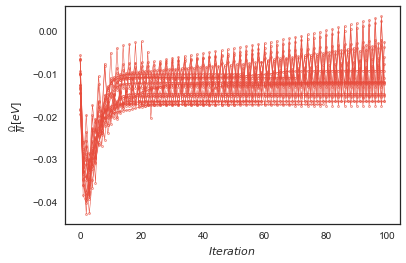

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
for seed in np.arange(1, 20):
    # Initial conditions
    nUp, nDown = random(2 / 3, nOrb * Nx * Ny, seed)
    nUp, nDown, energies,\
    lastGrandpotential, itSwitch, lastIt, mu,\
    eUp, eDown, wfUp, wfDown\
    = solve_self_consistent_real_space(Nx, Ny, nOrb, nHole, invTemp, betaStart, betaSpeed, betaThreshold,\
    anneal_or_not, t, U, itMax, dampFreq, dyn, singleExcitationFreq, osc,\
    K, abs_t0, delta, nUp, nDown)
    
    showGrandpotentialMinimization(itSwitch, lastIt, energies, ax)

# Show solution

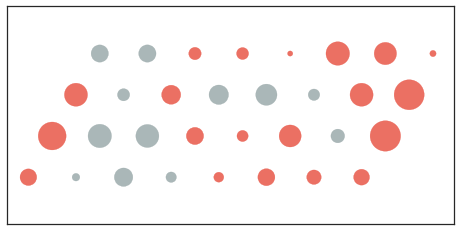

In [15]:
dotscale = 1000
SAVE = False
name = 'solution_ferroU' + str(U) + 'Nx' + str(Nx) + 'Ny' + str(Ny)
showLattice(nUp, nDown, Nx, Ny, nOrb, dotscale, SAVE, name)

# Show minimization of grandpotential functional

The final value of the grandpotential per site was:  -0.0328122662776


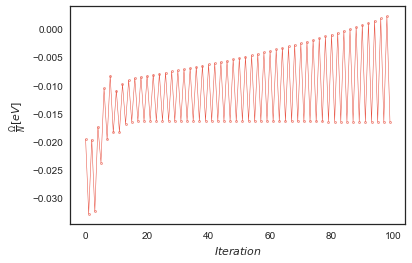

In [16]:
showGrandpotentialMinimization(itSwitch, lastIt, energies)
print("The final value of the grandpotential per site was: ", lastGrandpotential)